In [1]:
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
# jupyter notebook warning 무시하기

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False

from glob import glob
import re
import math

In [2]:
file_list = []
for i in range(2015,2020):
    a = '../../data/team/해양환경측정망_'+str(i)+'.xlsx'
    file_list.append(a)
file_list

['../../data/team/해양환경측정망_2015.xlsx',
 '../../data/team/해양환경측정망_2016.xlsx',
 '../../data/team/해양환경측정망_2017.xlsx',
 '../../data/team/해양환경측정망_2018.xlsx',
 '../../data/team/해양환경측정망_2019.xlsx']

In [3]:
df = pd.read_excel('../../data/team/해양환경측정망_2019.xlsx',skiprows = 3, header=None)
ex = df[df[2].str.contains('항만',na=False)]


In [109]:
# 전처리 1
key = ['2월','5월','8월','11월']
con_data = pd.DataFrame()
for i in file_list : 
    df_all = pd.read_excel(i, skiprows = 3, header=None, sheet_name=None)
    for j in key:
        # 월별시트 호출
        data = df_all[j]
        
        # h제거
        h= data[data[4].str.contains('H', na=False)]
        h[4] = h[4].str.get(i=1)
        h1 = h.index
        for h_1 in range(len(h1)):
            data.loc[h1[h_1],4] = h.loc[h1[h_1],4]
            
        # 항만제거
        man = data[data[2].str.contains('항만', na=False)]
        man[2] = man[2].str[8:-1]
        h2 = man.index
        for h_2 in h2:
            data.loc[h_2,2] = man.loc[h_2,2]
            
        
        # 1로 시작하는 지역의 인덱스 추출
        index = data[data[4] == 1].index
        
        # index, st를 통해 빈칸채우기
        for z in range(len(index)):  
            insert_l = data.loc[index[z],:3]
            
            # 마지막인덱스 이외의 인덱스
            if index[z] < index[len(index)-1]:
                
                # 항만 중 이중으로 열병합 되어있는 경우 0:3까지 nan처리됨
                # nan값은 nan == nan 일시 Flase가 나옴
                # 0:3까지의 값은 이전 인덱스의 값과 동일하기 때문에 이전 인덱스의 값 호출
                if data.loc[index[z],3] != data.loc[index[z],3]:
                    for k in range(index[z],index[z+1]):
                        insert_l_1 = data.loc[index[z]-1,:3]
                        data.loc[k,:3] = insert_l_1
                else :
                    # 1이 연속으로 붙어있는데 한 카테고리일 경우
                    if data.loc[index[z],0] != data.loc[index[z],0]:
                        insert_l_1 = data.loc[index[z]-1,:2]
                        for a_1 in range(index[z],len(data)):
                            data.loc[a_1,:2] = insert_l_1
                    else:
                        
                        for a in range(index[z],index[z+1]):
                            data.loc[a,:3] = insert_l
                        
            # 마지막 인덱스
            else : 
                if data.loc[index[z],3] != data.loc[index[z],3]:
                    for p in range(index[z],len(data)):
                        insert_l_1 = data.loc[index[z]-1,:3]
                        data.loc[p,:3] = insert_l_1
                else:
                    
                    if data.loc[index[z],0] != data.loc[index[z],0]:
                        insert_l_1 = data.loc[index[z]-1,:2]
                        for e_1 in range(index[z],len(data)):
                            data.loc[e_1,:2] = insert_l_1
                    else: 
                        
                        for e in range(index[z],len(data)):
                            data.loc[e,:3] = insert_l
                    
                    
        con_data = pd.concat([con_data, data])
        # 빈칸채우기 끝
    
# 중간에 항만으로 되어있는 게 nan값으로 넘어가면서 nanull에서 삭제됨
# 이거 해결해야지 제대로 데이터 정제된거 같은데


In [110]:
con_data.to_csv('../../data/team/해양환경측정망_합본_R.csv', index=False, encoding = 'ANSI')
con_data.to_csv('../../data/team/해양환경측정망_합본.csv', index=False, encoding = 'utf-8')

In [167]:
df = pd.read_csv('../../data/team/해양환경측정망_합본.csv', encoding='utf-8', engine='python')

index_df = pd.read_excel('../../data/team/해양환경측정망_2019.xlsx')

In [168]:
index_list = index_df.loc[0,:]


In [169]:
for i in range(37):
    df.rename(columns = {str(i): index_list[i]}, inplace = True)
df

,년,월,생태구역,연안명칭,St.\nNo\n,해수수질기준,표층수온,저층수온,표층염분,저층염분,...,저층DIP,표층T-P,저층T-P,표층SiO2-Si,저층SiO2-Si,표층SS,저층SS,표층Chl-a,저층Chl-a,표층투명도
0,2015.0,2.0,동 해,거진연안,1,NaN,5.3747,4.3124,34.0458,33.9969,...,9.672,21.04218,19.81086,225.000,207.540,1.00,1.30,0.564,0.564,15.0
1,2015.0,2.0,동 해,거진연안,2,NaN,5.1215,4.9201,33.9709,34.0076,...,9.889,20.68537,21.83516,222.700,223.100,1.90,1.80,0.486,0.362,13.0
2,2015.0,2.0,동 해,속초연안,1,NaN,5.1585,5.3037,33.9601,34.0315,...,11.656,25.20982,23.42577,249.500,247.020,1.50,1.60,0.286,0.410,13.0
3,2015.0,2.0,동 해,속초연안,2,NaN,5.4283,5.3188,34.0491,34.0469,...,12.028,25.58926,22.79399,250.900,251.220,2.30,1.90,0.390,0.452,13.0
4,2015.0,2.0,동 해,속초연안,3,NaN,5.4563,5.3802,34.0606,34.0528,...,12.245,22.01837,22.34480,259.100,250.880,2.10,1.40,0.414,0.474,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10311,2019.0,11.0,대한해협,양양남대천하구,1,II,17.6717,17.6490,33.1627,33.1520,...,4.247,13.48500,12.24500,191.268,181.636,3.05,3.40,1.000,0.938,5.0
10312,2019.0,11.0,대한해협,양양남대천하구,10,I,17.5283,17.2810,32.0577,32.6068,...,16.244,48.26700,33.51100,336.532,340.620,4.20,5.65,1.750,1.512,9.0
10313,2019.0,11.0,대한해협,양양남대천하구,11,I,16.9024,17.1350,31.9541,32.2663,...,11.780,31.62000,34.87500,277.620,347.536,4.55,3.90,5.200,4.920,4.3
10314,2019.0,11.0,대한해협,양양남대천하구,12,I,17.6114,18.1653,32.0295,32.2667,...,13.113,25.73000,34.56500,320.124,390.544,5.10,5.25,6.500,4.920,5.0


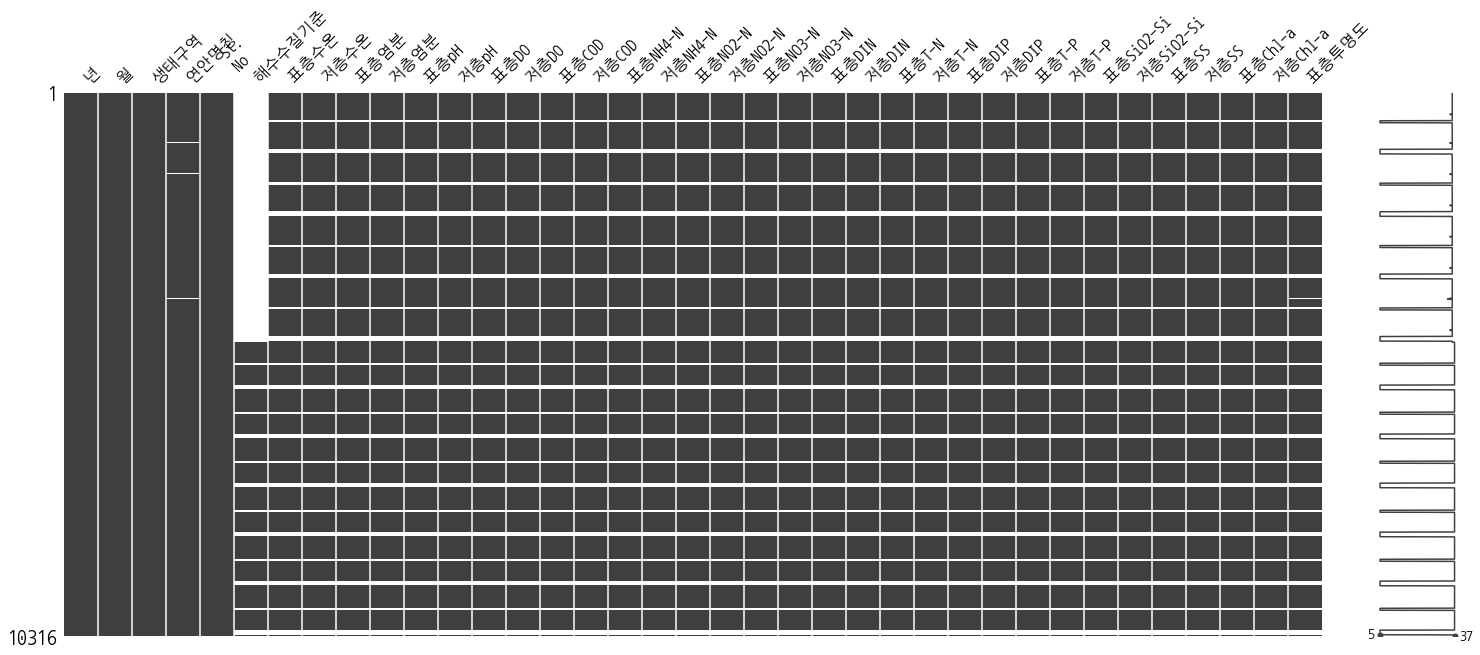

In [170]:
import missingno as msno
msno.matrix(df)

In [171]:
df = df[df['년'] >= 2017]
df = df.dropna()
df

,년,월,생태구역,연안명칭,St.\nNo\n,해수수질기준,표층수온,저층수온,표층염분,저층염분,...,저층DIP,표층T-P,저층T-P,표층SiO2-Si,저층SiO2-Si,표층SS,저층SS,표층Chl-a,저층Chl-a,표층투명도
4736,2017.0,2.0,동 해,거진연안,1,I,10.5810,10.2312,34.3232,34.3175,...,10.664,20.677,25.389,228.088,233.296,9.25,6.25,0.688,0.494,13.0
4737,2017.0,2.0,동 해,거진연안,2,I,10.0457,9.8817,34.3308,34.3363,...,10.974,20.739,24.521,232.288,266.056,11.85,13.40,0.000,0.506,9.0
4738,2017.0,2.0,동 해,속초연안,1,I,10.1998,10.1294,34.2738,34.2607,...,10.664,24.862,20.212,177.184,258.804,10.55,7.75,0.636,0.468,11.0
4739,2017.0,2.0,동 해,속초연안,2,I,10.3197,10.3108,34.3053,34.3041,...,9.269,19.592,18.879,208.852,201.824,9.70,9.55,0.426,0.530,13.0
4740,2017.0,2.0,동 해,속초연안,3,I,10.2328,10.1598,34.3015,34.2956,...,9.114,13.671,24.180,211.344,188.776,12.00,4.30,0.000,0.396,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10311,2019.0,11.0,대한해협,양양남대천하구,1,II,17.6717,17.6490,33.1627,33.1520,...,4.247,13.485,12.245,191.268,181.636,3.05,3.40,1.000,0.938,5.0
10312,2019.0,11.0,대한해협,양양남대천하구,10,I,17.5283,17.2810,32.0577,32.6068,...,16.244,48.267,33.511,336.532,340.620,4.20,5.65,1.750,1.512,9.0
10313,2019.0,11.0,대한해협,양양남대천하구,11,I,16.9024,17.1350,31.9541,32.2663,...,11.780,31.620,34.875,277.620,347.536,4.55,3.90,5.200,4.920,4.3
10314,2019.0,11.0,대한해협,양양남대천하구,12,I,17.6114,18.1653,32.0295,32.2667,...,13.113,25.730,34.565,320.124,390.544,5.10,5.25,6.500,4.920,5.0


In [172]:
df.to_csv('../../data/team/해양환경측정망_합본_R_0.csv', index=False, encoding = 'ANSI')
df.to_csv('../../data/team/해양환경측정망_합본_0.csv', index=False, encoding = 'utf-8')

In [173]:
loc_list = df['연안명칭'].unique()
list_name = ['연안','만','하구','만','.자란만','동안','남안','외안','호']
df['구군'] = df['연안명칭']
for j in list_name:
    name_length = df['연안명칭'].str.find(j)

    for i in name_length.index :
        if name_length[i] != -1:
            df.loc[i,'구군'] = df.loc[i, '연안명칭'][0:name_length[i]]
        
        # 처음에 모든 연안명칭을 구군에 넣은 뒤 정제한 데이터를 넣으면 nan값을 해결할 수 있다.
        #else : 
        #   df.loc[i,'구군'] = df.loc[i,'연안명칭']

In [174]:
df.to_csv('../../data/team/해양환경측정망_합본_1_R.csv', index=False, encoding = 'ANSI')
df.to_csv('../../data/team/해양환경측정망_합본_1.csv', index=False, encoding = 'utf-8')

In [238]:
df = pd.read_csv('../../data/team/해양환경측정망_합본_1.csv')

class_list = df['해수수질기준'].unique()
a = 1
for i in class_list:
    index = df[df['해수수질기준']==i].index
    for j in index:
        df.loc[index,'해수수질기준'] = a
    a += 1
for i in range(len(df)):
    if df.loc[i,'생태구역'] =='동 해':
        df.loc[i,'생태구역'] = '동해'

In [239]:
# 형식이 다른  15, 16 년도 자료를 병합
df1 = pd.read_csv('../../data/team/해양환경측정망_15,16.csv')

In [240]:
df = pd.concat([df,df1])


In [241]:
df.to_csv('../../data/team/해양환경측정망_합본_2_R.csv', index=False, encoding = 'ANSI')
df.to_csv('../../data/team/해양환경측정망_합본_2.csv', index=False, encoding = 'utf-8')

In [4]:
df = pd.read_csv('../../data/team/해양환경측정망_합본_2.csv',encoding = 'utf-8')

In [5]:
# 자료기입상 발생한 오타같음 7,70 -> 7.70
df.iloc[7952,11] = 7.90
df.to_csv('../../data/team/해양환경측정망_합본_2_R.csv', index=False, encoding = 'ANSI')
df.to_csv('../../data/team/해양환경측정망_합본_2.csv', index=False, encoding = 'utf-8')

In [244]:
df.iloc[7952]

년                2016
월                   8
생태구역               동해
연안명칭             죽변연안
St.\nNo\n           2
해수수질기준              3
표층수온          21.6531
저층수온           10.841
표층염분          33.1577
저층염분          34.1415
표층pH             8.01
저층pH              7.9
표층DO          8.15617
저층DO          6.88341
표층COD         1.23354
저층COD        0.471647
표층NH4-N         6.888
저층NH4-N         15.82
표층NO2-N          2.17
저층NO2-N          3.43
표층NO3-N       4.36333
저층NO3-N        92.162
표층DIN         13.4213
저층DIN         111.412
표층T-N         127.232
저층T-N         243.782
표층DIP         1.35367
저층DIP          16.709
표층T-P           8.525
저층T-P          26.567
표층SiO2-Si      68.488
저층SiO2-Si     308.644
표층SS            10.35
저층SS              5.5
표층Chl-a         0.244
저층Chl-a         0.392
표층투명도              12
구군                 죽변
Ds            8.91058
Name: 7952, dtype: object

In [245]:
col_list = df.columns[6:37]
col_list

Index(['표층수온', '저층수온', '표층염분', '저층염분', '표층pH', '저층pH', '표층DO', '저층DO', '표층COD',
       '저층COD', '표층NH4-N', '저층NH4-N', '표층NO2-N', '저층NO2-N', '표층NO3-N',
       '저층NO3-N', '표층DIN', '저층DIN', '표층T-N', '저층T-N', '표층DIP', '저층DIP',
       '표층T-P', '저층T-P', '표층SiO2-Si', '저층SiO2-Si', '표층SS', '저층SS', '표층Chl-a',
       '저층Chl-a', '표층투명도'],
      dtype='object')

In [246]:
# 오타로 dtype이 오브젝트형이여서 float으로 변환
df[col_list] = df[col_list].astype(float)

In [247]:
for i in col_list:
    c_max = df[i].max()
    c_min = df[i].min()
    df[i] = (df[i]-c_min)/(c_max-c_min)

In [248]:
df.to_csv('../../data/team/해양환경측정망_maxmin_R.csv', index=False, encoding = 'ANSI')
df.to_csv('../../data/team/해양환경측정망_maxmin.csv', index=False, encoding = 'utf-8')

In [2]:
a = pd.read_csv('../../data/team/해양환경측정망_합본_2.csv', encoding = 'utf-8')

        

,년,월,생태구역,연안명칭,St.No\n,조사일,조사시간,기상,Latitude,Longitude,...,표층T-P,저층T-P,표층SiO2-Si,저층SiO2-Si,표층SS,저층SS,표층Chl-a,저층Chl-a,표층투명도,구군
0,2017.0,2.0,동 해,거진연안,1,19.0,11:35:00,구름조금,38˚ 24´ 30˝,128˚ 30´ 20˝,...,20.677,25.389,228.088,233.296,9.25,6.25,0.688,0.494,13.0,거진
1,2017.0,2.0,동 해,거진연안,2,19.0,11:00:00,구름조금,38˚ 26´ 25˝,128˚ 27´ 35˝,...,20.739,24.521,232.288,266.056,11.85,13.40,0.000,0.506,9.0,거진
2,2017.0,2.0,동 해,속초연안,1,19.0,07:35:00,구름조금,38˚ 11´ 59˝,128˚ 36´ 18˝,...,24.862,20.212,177.184,258.804,10.55,7.75,0.636,0.468,11.0,속초
3,2017.0,2.0,동 해,속초연안,2,19.0,07:53:00,구름조금,38˚ 12´ 49˝,128˚ 36´ 42˝,...,19.592,18.879,208.852,201.824,9.70,9.55,0.426,0.530,13.0,속초
4,2017.0,2.0,동 해,속초연안,3,19.0,08:05:00,구름조금,38˚ 13´ 15˝,128˚ 36´ 49˝,...,13.671,24.180,211.344,188.776,12.00,4.30,0.000,0.396,10.0,속초
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793,2019.0,11.0,동해,왕피천하구,1,11.0,09:00:00,구름조금,38˚ 06´ 29˝,128˚ 38´ 52˝,...,13.485,12.245,191.268,181.636,3.05,3.40,1.000,0.938,5.0,왕피천
4794,2019.0,11.0,동해,왕피천하구,10,17.0,15:25:00,구름많음,"35o 01' 45""","128o 36' 28""",...,48.267,33.511,336.532,340.620,4.20,5.65,1.750,1.512,9.0,왕피천
4795,2019.0,11.0,동해,왕피천하구,11,19.0,10:35:00,맑음,"35o 04' 56""","128o 31' 51""",...,31.620,34.875,277.620,347.536,4.55,3.90,5.200,4.920,4.3,왕피천
4796,2019.0,11.0,동해,왕피천하구,12,19.0,13:40:00,맑음,"34o 56' 30""","128o 27' 28""",...,25.730,34.565,320.124,390.544,5.10,5.25,6.500,4.920,5.0,왕피천


In [209]:
def aaa(t, S) : 
    T = 273.15 + t
    
    C = -173.4292 + 249.6339*(10**2 * T**-1) + 143.3483 * math.log(T * 10**-2) -21.8492*(T * 10**-2) -S*(0.033096 - 0.014259* T *10**-2 + 0.0017 * T**2 * 10**-4 )
    c = math.e**C
    result = c*32/22.4
    return result

In [211]:
a['Ds'] = ''
for i in range(len(a)):
    a.loc[i,'Ds'] = aaa(a.loc[i,'저층수온'],a.loc[i,'저층염분'])

In [212]:
do = a['저층DO']/a['Ds']

din = a['표층DIN']
dip = a['표층DIP']
chl = a['표층Chl-a']
w = a['표층투명도']

In [213]:
do

0        1.00857
1        1.02117
2        1.02626
3        1.01951
4        1.02902
          ...   
4793     1.01949
4794     0.96459
4795    0.969575
4796    0.994766
4797    0.669434
Length: 4798, dtype: object

In [ ]:
chl_a = []
din_a = []
dip_a = []
w_a = []
do_a = []
for i in range(len(a)):
    chl_a.append(chl_convert(i))
    din_a.append(din_convert(i))
    dip_a.append(dip_convert(i))
    w_a.append(w_convert(i))
    do_a.append(do_convert(i))
su = []
for i in range(len(a)):
    su.append(cul(do_a[i],chl_a[i],w_a[i],din_a[i],dip_a[i]))

In [ ]:
a['수질분류'] = ''
for i in range(len(a)):
    a.loc[i,'수질분류'] = classfy(su[i])
    

In [220]:
a.to_csv()

In [217]:
def classfy(su):
    if i <=23:
        return 1
    elif (i >23)&(i<=33):
        return 2
    elif (i >33)&(i<=46):
        return 3
    elif (i >46)&(i<=59):
        return 4
    elif (i >59):
        return 5

    
            

In [106]:
def cul(a,b,c,d,e):
    sum = 10*a+6*(b+c)/2+4*(d+e)/2
    return sum

In [163]:
def chl_convert(a1):
    if a.loc[a1,'생태구역'] =='동해':
        b = 2.1
        if chl[a1] <= b :
            return 1
        elif (chl[a1] > b)&(chl[a1] <= b + b*0.1):
            return 2
        elif (chl[a1] > b + b*0.1)&(chl[a1] <= b + b*0.25) :
            return 3
        elif (chl[a1] > b + b*0.25)&(chl[a1] <= b + b*0.50) :
            return 4
        else :
            return 5
        
    elif a.loc[a1,'생태구역'] =='대한해협':
        b = 6.3
        if chl[a1] <= b :
            return 1
        elif (chl[a1] > b)&(chl[a1] <= b + b*0.1):
            return 2
        elif (chl[a1] > b + b*0.1)&(chl[a1] <= b + b*0.25) :
            return 3
        elif (chl[a1] > b + b*0.25)&(chl[a1] <= b + b*0.50) :
            return 4
        else :
            return 5
    elif a.loc[a1,'생태구역'] =='서남해역':
        b = 3.7
        if chl[a1] <= b :
            return 1
        elif (chl[a1] > b)&(chl[a1] <= b + b*0.1):
            return 2
        elif (chl[a1] > b + b*0.1)&(chl[a1] <= b + b*0.25) :
            return 3
        elif (chl[a1] > b + b*0.25)&(chl[a1] <= b + b*0.50) :
            return 4
        else :
            return 5
    elif a.loc[a1,'생태구역'] =='제주':
        b = 1.6
        if chl[a1] <= b :
            return 1
        elif (chl[a1] > b)&(chl[a1] <= b + b*0.1):
            return 2
        elif (chl[a1] > b + b*0.1)&(chl[a1] <= b + b*0.25) :
            return 3
        elif (chl[a1] > b + b*0.25)&(chl[a1] <= b + b*0.50) :
            return 4
        else :
            return 5
    elif a.loc[a1,'생태구역'] =='서해중부':
        b = 2.2
        if chl[a1] <= b :
            return 1
        elif (chl[a1] > b)&(chl[a1] <= b + b*0.1):
            return 2
        elif (chl[a1] > b + b*0.1)&(chl[a1] <= b + b*0.25) :
            return 3
        elif (chl[a1] > b + b*0.25)&(chl[a1] <= b + b*0.50) :
            return 4
        else :
            return 5

# DO 계수 
def do_convert(a1):
        b = 0.9
        if do[a1] >= b :
            return 1
        elif (do[a1] < b)&(do[a1] >= b - b*0.1):
            return 2
        elif (do[a1] < b - b*0.1)&(do[a1] >= b - b*0.25) :
            return 3
        elif (do[a1] < b - b*0.25)&(do[a1] >= b - b*0.50) :
            return 4
        else :
            return 5
    
        
        
        
def dip_convert(a1):
    if a.loc[a1,'생태구역'] =='동해':
        b = 20
        if dip[a1] <= b :
            return 1
        elif (dip[a1] > b)&(dip[a1] <= b + b*0.1):
            return 2
        elif (dip[a1] > b + b*0.1)&(dip[a1] <= b + b*0.25) :
            return 3
        elif (dip[a1] > b + b*0.25)&(dip[a1] <= b + b*0.50) :
            return 4
        else :
            return 5
        
    elif a.loc[a1,'생태구역'] =='대한해협':
        b = 35
        if dip[a1] <= b :
            return 1
        elif (dip[a1] > b)&(dip[a1] <= b + b*0.1):
            return 2
        elif (dip[a1] > b + b*0.1)&(dip[a1] <= b + b*0.25) :
            return 3
        elif (dip[a1] > b + b*0.25)&(dip[a1] <= b + b*0.50) :
            return 4
        else :
            return 5
    elif a.loc[a1,'생태구역'] =='서남해역':
        b = 25
        if dip[a1] <= b :
            return 1
        elif (dip[a1] > b)&(dip[a1] <= b + b*0.1):
            return 2
        elif (dip[a1] > b + b*0.1)&(dip[a1] <= b + b*0.25) :
            return 3
        elif (dip[a1] > b + b*0.25)&(dip[a1] <= b + b*0.50) :
            return 4
        else :
            return 5
    elif a.loc[a1,'생태구역'] =='제주':
        b = 15
        if dip[a1] <= b :
            return 1
        elif (dip[a1] > b)&(dip[a1] <= b + b*0.1):
            return 2
        elif (dip[a1] > b + b*0.1)&(dip[a1] <= b + b*0.25) :
            return 3
        elif (dip[a1] > b + b*0.25)&(dip[a1] <= b + b*0.50) :
            return 4
        else :
            return 5
    elif a.loc[a1,'생태구역'] =='서해중부':
        b = 30
        if dip[a1] <= b :
            return 1
        elif (dip[a1] > b)&(dip[a1] <= b + b*0.1):
            return 2
        elif (dip[a1] > b + b*0.1)&(dip[a1] <= b + b*0.25) :
            return 3
        elif (dip[a1] > b + b*0.25)&(dip[a1] <= b + b*0.50) :
            return 4
        else :
            return 5
        
def din_convert(a1):
    if a.loc[a1,'생태구역'] =='동해':
        b = 140
        if din[a1] <= b :
            return 1
        elif (din[a1] > b)&(din[a1] <= b + b*0.1):
            return 2
        elif (din[a1] > b + b*0.1)&(din[a1] <= b + b*0.25) :
            return 3
        elif (din[a1] > b + b*0.25)&(din[a1] <= b + b*0.50) :
            return 4
        else :
            return 5
        
    elif a.loc[a1,'생태구역'] =='대한해협':
        b = 220
        if din[a1] <= b :
            return 1
        elif (din[a1] > b)&(din[a1] <= b + b*0.1):
            return 2
        elif (din[a1] > b + b*0.1)&(din[a1] <= b + b*0.25) :
            return 3
        elif (din[a1] > b + b*0.25)&(din[a1] <= b + b*0.50) :
            return 4
        else :
            return 5
    elif a.loc[a1,'생태구역'] =='서남해역':
        b = 230
        if din[a1] <= b :
            return 1
        elif (din[a1] > b)&(din[a1] <= b + b*0.1):
            return 2
        elif (din[a1] > b + b*0.1)&(din[a1] <= b + b*0.25) :
            return 3
        elif (din[a1] > b + b*0.25)&(din[a1] <= b + b*0.50) :
            return 4
        else :
            return 5
    elif a.loc[a1,'생태구역'] =='제주':
        b = 165
        if din[a1] <= b :
            return 1
        elif (din[a1] > b)&(din[a1] <= b + b*0.1):
            return 2
        elif (din[a1] > b + b*0.1)&(din[a1] <= b + b*0.25) :
            return 3
        elif (din[a1] > b + b*0.25)&(din[a1] <= b + b*0.50) :
            return 4
        else :
            return 5
    elif a.loc[a1,'생태구역'] =='서해중부':
        b = 425
        if chl[a1] <= b :
            return 1
        elif (din[a1] > b)&(din[a1] <= b + b*0.1):
            return 2
        elif (din[a1] > b + b*0.1)&(din[a1] <= b + b*0.25) :
            return 3
        elif (din[a1] > b + b*0.25)&(din[a1] <= b + b*0.50) :
            return 4
        else :
            return 5
        
def w_convert(a1):
    if a.loc[a1,'생태구역'] =='동해':
        b = 8.5
        if w[a1] >= b :
            return 1
        elif (w[a1] < b)&(w[a1] >= b - b*0.1):
            return 2
        elif (w[a1] < b- b*0.1)&(w[a1] >= b - b*0.25) :
            return 3
        elif (w[a1] < b - b*0.25)&(w[a1] >= b - b*0.50) :
            return 4
        else :
            return 5
        
    elif a.loc[a1,'생태구역'] =='대한해협':
        b = 2.5
        if w[a1] >= b :
            return 1
        elif (w[a1] < b)&(w[a1] >= b - b*0.1):
            return 2
        elif (w[a1] < b- b*0.1)&(w[a1] >= b - b*0.25) :
            return 3
        elif (w[a1] < b - b*0.25)&(w[a1] >= b - b*0.50) :
            return 4
        else :
            return 5
    elif a.loc[a1,'생태구역'] =='서남해역':
        b = 0.5
        if w[a1] >= b :
            return 1
        elif (w[a1] < b)&(w[a1] >= b - b*0.1):
            return 2
        elif (w[a1] < b- b*0.1)&(w[a1] >= b - b*0.25) :
            return 3
        elif (w[a1] < b - b*0.25)&(w[a1] >= b - b*0.50) :
            return 4
        else :
            return 5
    elif a.loc[a1,'생태구역'] =='제주':
        b = 8.0
        if w[a1] >= b :
            return 1
        elif (w[a1] < b)&(w[a1] >= b - b*0.1):
            return 2
        elif (w[a1] < b- b*0.1)&(w[a1] >= b - b*0.25) :
            return 3
        elif (w[a1] < b - b*0.25)&(w[a1] >= b - b*0.50) :
            return 4
        else :
            return 5
    elif a.loc[a1,'생태구역'] =='서해중부':
        b = 1.0
        if w[a1] >= b :
            return 1
        elif (w[a1] < b)&(w[a1] >= b - b*0.1):
            return 2
        elif (w[a1] < b- b*0.1)&(w[a1] >= b - b*0.25) :
            return 3
        elif (w[a1] < b - b*0.25)&(w[a1] >= b - b*0.50) :
            return 4
        else :
            return 5